In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Downloading data**

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Feature engineering**
- first letter of 'Cabin'
- number of 'Cabin'
- quantity of cabins

In [4]:
import re
train['Cabin'] = train.Cabin.fillna('None')
train['Cabin1'] = train.Cabin.apply(lambda x: x[0])
train['Cabin_num'] = train.Cabin.apply(lambda x: re.findall(r'\d+', x))
train['Cabin_'] = train.Cabin_num.apply(lambda x: len(x))
train['Cabin_num'] = train.Cabin_num.apply(lambda x: int(x[0]) if len(x)>0 else 0)

test['Cabin'] = test.Cabin.fillna('None')
test['Cabin1'] = test.Cabin.apply(lambda x: x[0])
test['Cabin_num'] = test.Cabin.apply(lambda x: re.findall(r'\d+', x))
test['Cabin_'] = test.Cabin_num.apply(lambda x: len(x))
test['Cabin_num'] = test.Cabin_num.apply(lambda x: int(x[0]) if len(x)>0 else 0)

train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin1,Cabin_num,Cabin_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,N,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,N,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,N,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B,42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,N,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,148,1


**Filling missing values**

In [6]:
train = train.fillna(train.median())
test = test.fillna(test.median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [7]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Cabin1         0
Cabin_num      0
Cabin_         0
dtype: int64

In [8]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin1,Cabin_num,Cabin_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,N,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,N,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,N,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,B,42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,N,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,148,1


**Dropping 'useless' columns**

In [10]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

**Some information and plots**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Cabin1     891 non-null    object 
 9   Cabin_num  891 non-null    int64  
 10  Cabin_     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


<AxesSubplot:>

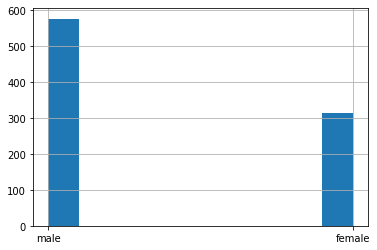

In [12]:
train.Sex.hist()

In [13]:
# train.Cabin.hist()
# train.Cabin.unique()

<AxesSubplot:>

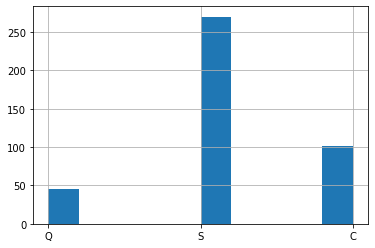

In [14]:
test.Embarked.hist()

**One-hot encoding of categorical features**

In [15]:
train1 = pd.get_dummies(train)
test1 = pd.get_dummies(test)

**Creating train dataset and target**

In [16]:
target = train1.Survived
train_df = train1.drop(['Survived','Cabin1_T'], axis=1)
# train = train.drop('Survived', axis=1)

In [17]:
test1

,Pclass,Age,SibSp,Parch,Fare,Cabin_num,Cabin_,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_N
0,3,34.5,0,0,7.8292,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,3,47.0,1,0,7.0000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,3,27.0,0,0,8.6625,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,3,22.0,1,1,12.2875,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
414,1,39.0,0,0,108.9000,105,1,1,0,1,0,0,0,0,1,0,0,0,0,0
415,3,38.5,0,0,7.2500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
416,3,27.0,0,0,8.0500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


**The model - 
CatBoostClassifier**

In [18]:
from sklearn.model_selection import cross_val_score
import catboost
# from catboost import Pool

MAX_ITER = 6000
PATIENCE = 100
DISPLAY_FREQ = 100

MODEL_PARAMS = {'random_seed': 1234,    
                'learning_rate': 0.001,                
                'iterations': MAX_ITER,
                'early_stopping_rounds': PATIENCE,
                'metric_period': DISPLAY_FREQ,
#                 'use_best_model': True,
                'eval_metric': 'Accuracy',
#                 'task_type': 'GPU',
                'one_hot_max_size': 9
               }

# pool_train = Pool(train, target,
#                   cat_features = ['Sex', 'Embarked'])
# pool_test = Pool(test, cat_features = ['Sex', 'Embarked'])

model = catboost.CatBoostClassifier(**MODEL_PARAMS)
model.fit(train_df, target,
        eval_set=[(train_df, target)],
#         early_stopping_rounds = PATIENCE,
#         metric_period = DISPLAY_FREQ
         )


0:	learn: 0.8193042	test: 0.8193042	best: 0.8193042 (0)	total: 58.4ms	remaining: 5m 50s
100:	learn: 0.8260382	test: 0.8260382	best: 0.8282828 (4)	total: 188ms	remaining: 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8282828283
bestIteration = 4

Shrink model to first 5 iterations.


In [19]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()

# model.fit(train_df, target)


In [20]:
# scores = cross_val_score(model, train, target, cv=5)
# scores

**Making prediction**

In [21]:
prediction = model.predict(test1)

In [22]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Making submission**

In [23]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [24]:
sub.Survived = prediction

In [25]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
sub.to_csv('submission.csv', index = False)